<a href="https://colab.research.google.com/github/JyotikaJayani-08/machine-learning-repos/blob/main/Covid19_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('country_vaccinations.csv')

In [ ]:
print(df.head())

       country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                 

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

In [ ]:
df.isnull()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,False,False,False,False,False,True,True,True,False,False,True,True,False,False,False
1,False,False,False,True,True,True,True,False,True,True,True,False,False,False,False
2,False,False,False,True,True,True,True,False,True,True,True,False,False,False,False
3,False,False,False,True,True,True,True,False,True,True,True,False,False,False,False
4,False,False,False,True,True,True,True,False,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
86508,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
86509,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
86510,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()
# returns the total number of missing values in a DataFrame.

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [ ]:
print(df.columns)

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')


<Axes: >

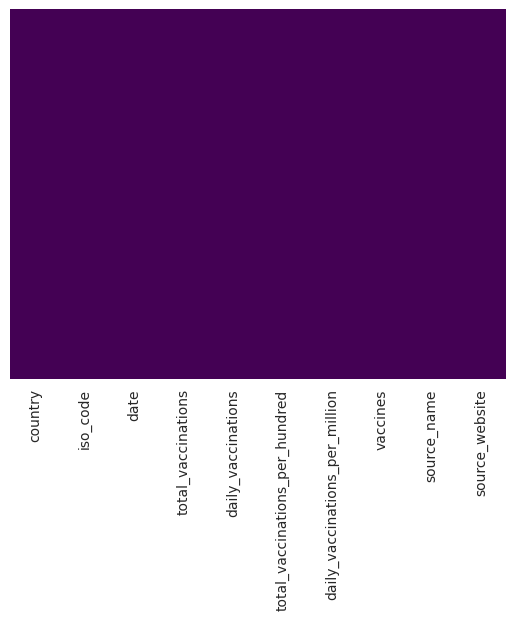

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
columns_of_interest = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']

In [ ]:
for col in columns_of_interest:
    if col not in df.columns:
        print(f"Column '{col}' is not in the DataFrame.")
    else:
        print(f"Column '{col}' found in the DataFrame.")

Column 'total_vaccinations' found in the DataFrame.
Column 'people_vaccinated' found in the DataFrame.
Column 'people_fully_vaccinated' found in the DataFrame.


In [ ]:
if all(col in df.columns for col in columns_of_interest):
    data = df[columns_of_interest].to_numpy()
    #handling missing values
    total_vaccinations = np.nan_to_num(data[:, 0])
    people_vaccinated = np.nan_to_num(data[:, 1])
    people_fully_vaccinated = np.nan_to_num(data[:, 2])
    #  sum
    sum_total_vaccinations = np.sum(total_vaccinations)
    sum_people_vaccinated = np.sum(people_vaccinated)
    sum_people_fully_vaccinated = np.sum(people_fully_vaccinated)
    # Mean
    mean_total_vaccinations = np.mean(total_vaccinations)
    mean_people_vaccinated = np.mean(people_vaccinated)
    mean_people_fully_vaccinated = np.mean(people_fully_vaccinated)
    # Median
    median_total_vaccinations = np.median(total_vaccinations)
    median_people_vaccinated = np.median(people_vaccinated)
    median_people_fully_vaccinated = np.median(people_fully_vaccinated)
    # Standard Deviation
    std_total_vaccinations = np.std(total_vaccinations)
    std_people_vaccinated = np.std(people_vaccinated)
    std_people_fully_vaccinated = np.std(people_fully_vaccinated)


In [ ]:
print("Total vaccinations sum:", sum_total_vaccinations)
print("People vaccinated sum:", sum_people_vaccinated)
print("People fully vaccinated sum:", sum_people_fully_vaccinated)
print("Mean total vaccinations:", mean_total_vaccinations)
print("Mean people vaccinated:", mean_people_vaccinated)
print("Mean people fully vaccinated:", mean_people_fully_vaccinated)
print("Median total vaccinations:", median_total_vaccinations)
print("Median people vaccinated:", median_people_vaccinated)
print("Median people fully vaccinated:", median_people_fully_vaccinated)
print("Standard deviation of total vaccinations:", std_total_vaccinations)
print("Standard deviation of people vaccinated:", std_people_vaccinated)
print("Standard deviation of people fully vaccinated:", std_people_fully_vaccinated)

Total vaccinations sum: 2002854013761.0
People vaccinated sum: 731113482252.0
People fully vaccinated sum: 548594310708.0
Mean total vaccinations: 23151169.938979562
Mean people vaccinated: 8451006.59159423
Mean people fully vaccinated: 6341251.048501942
Median total vaccinations: 1008.0
Median people vaccinated: 0.0
Median people fully vaccinated: 0.0
Standard deviation of total vaccinations: 161102746.5375513
Standard deviation of people vaccinated: 49698384.66921699
Standard deviation of people fully vaccinated: 38907060.63448682


In [ ]:
#DATA VISUALIZATION

In [ ]:
#Bar plot for total vaccination

In [ ]:
df_filled = df.fillna(0)

In [ ]:
country_vaccinations = df_filled.groupby('country')['total_vaccinations'].sum().sort_values(ascending=False).head(10)

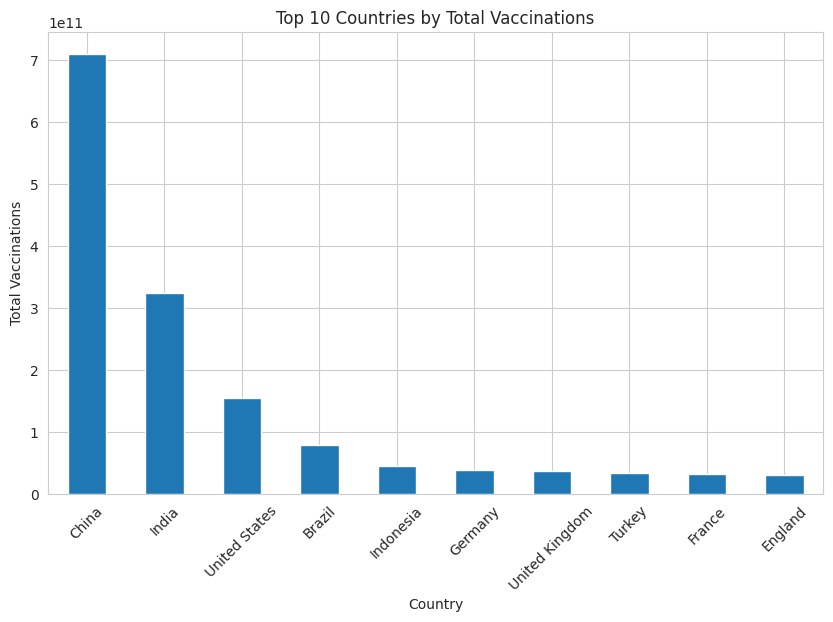

In [ ]:
plt.figure(figsize=(10, 6))
country_vaccinations.plot(kind='bar')
plt.title('Top 10 Countries by Total Vaccinations')
plt.xlabel('Country')
plt.ylabel('Total Vaccinations')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#line plot

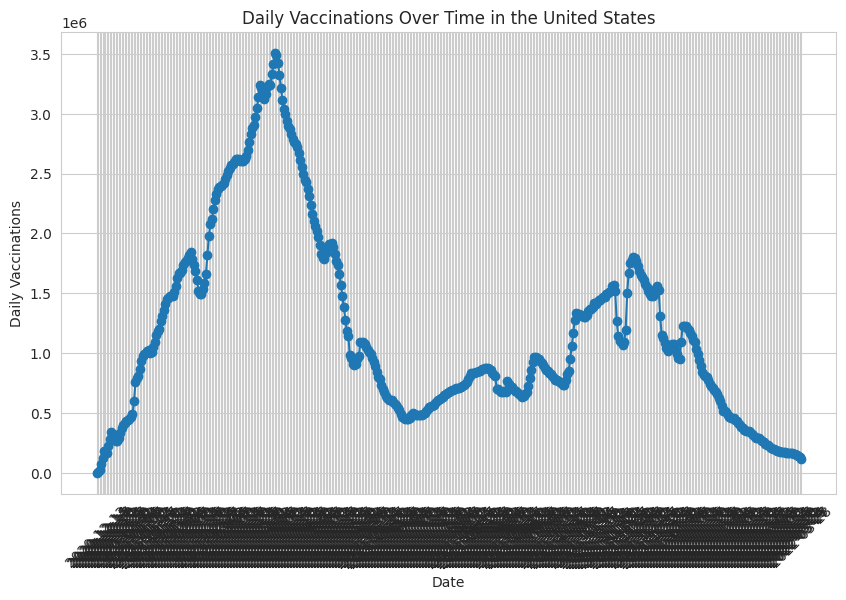

In [ ]:
country_data = df_filled[df_filled['country'] == 'United States']
plt.figure(figsize=(10, 6))
plt.plot(country_data['date'], country_data['daily_vaccinations'], marker='o')
plt.title('Daily Vaccinations Over Time in the United States')
plt.xlabel('Date')
plt.ylabel('Daily Vaccinations')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Scatter Plot for People Vaccinated vs. People Fully Vaccinated

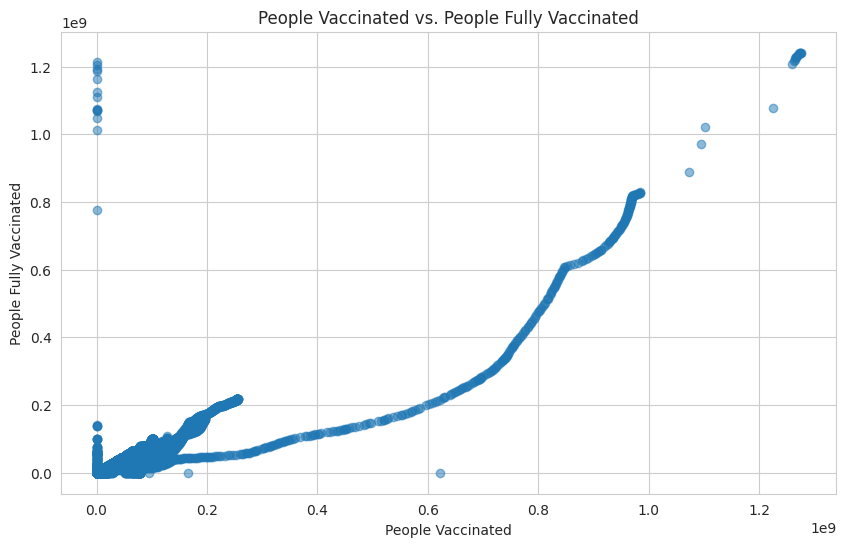

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_filled['people_vaccinated'], df_filled['people_fully_vaccinated'], alpha=0.5)
plt.title('People Vaccinated vs. People Fully Vaccinated')
plt.xlabel('People Vaccinated')
plt.ylabel('People Fully Vaccinated')
plt.show()

In [ ]:
# Histogram for Distribution of Total Vaccinations

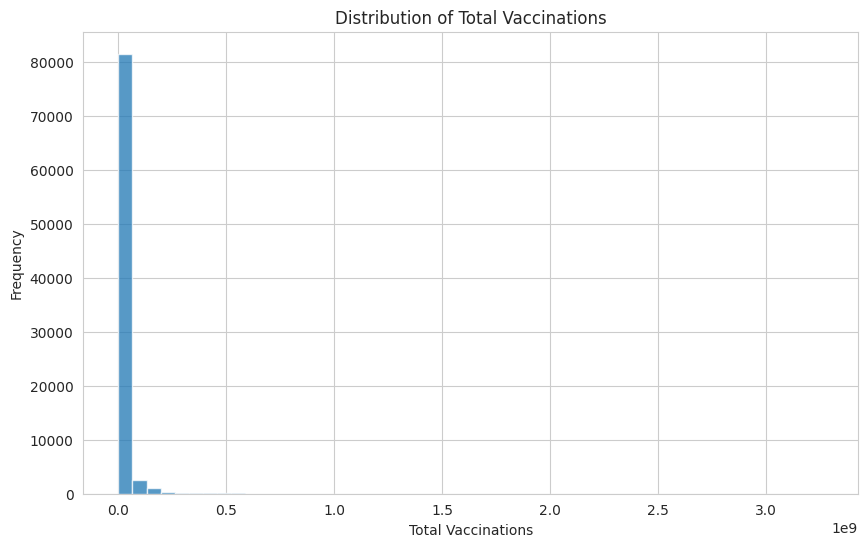

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_filled['total_vaccinations'], bins=50, alpha=0.75)
plt.title('Distribution of Total Vaccinations')
plt.xlabel('Total Vaccinations')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Box Plot for Daily Vaccinations by Country

In [ ]:
countries_with_data = df_filled.groupby('country').filter(lambda x: len(x) > 50)
top_countries = countries_with_data['country'].value_counts().head(10).index
filtered_data = df_filled[df_filled['country'].isin(top_countries)]

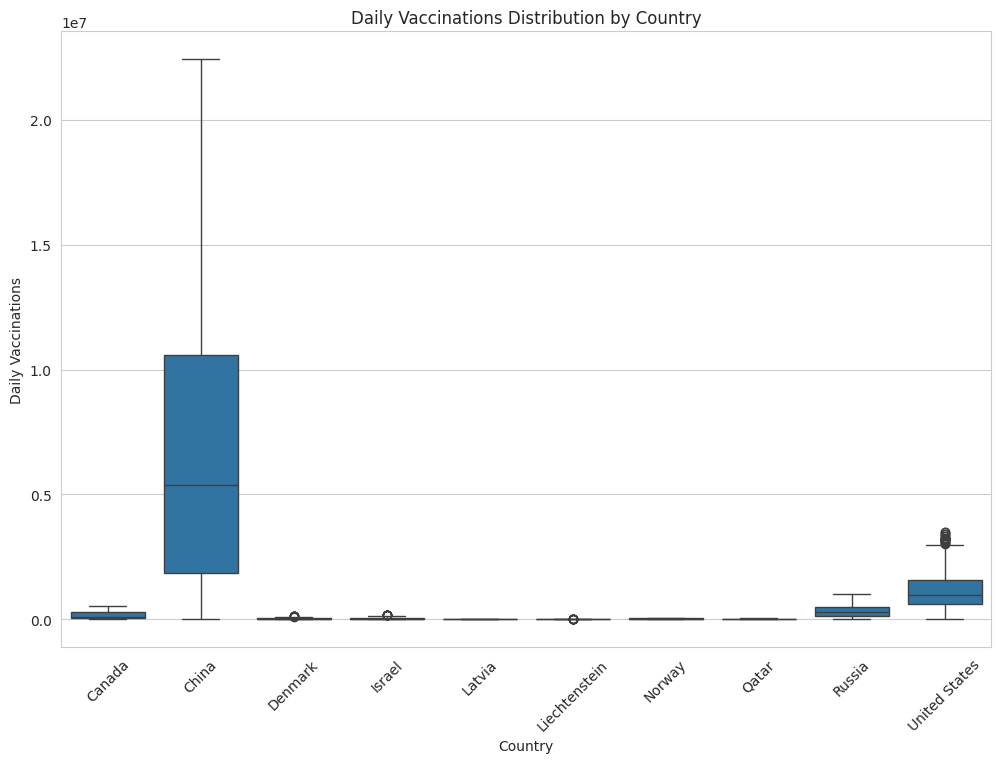

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='country', y='daily_vaccinations', data=filtered_data)
plt.title('Daily Vaccinations Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Daily Vaccinations')
plt.xticks(rotation=45)
plt.show()

In [ ]:
country_vaccinations = df_filled.groupby('country')['total_vaccinations'].sum()
top_countries_vaccinations = country_vaccinations.sort_values(ascending=False).head(10)

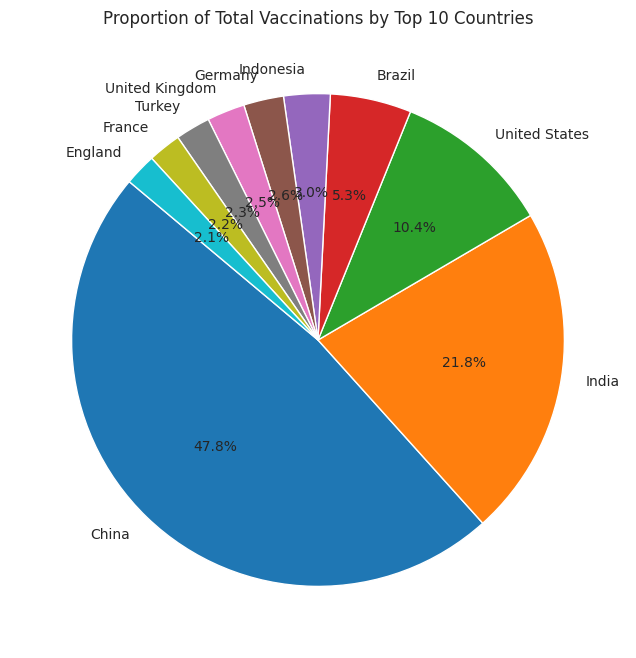

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(top_countries_vaccinations, labels=top_countries_vaccinations.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Total Vaccinations by Top 10 Countries')
plt.show()

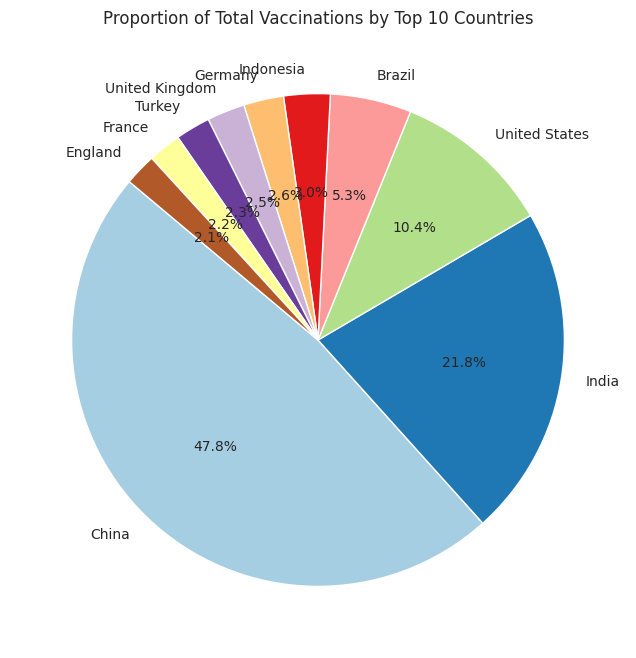

In [ ]:
colors = plt.cm.Paired(np.linspace(0, 1, len(top_countries_vaccinations)))
plt.figure(figsize=(10, 8))
plt.pie(top_countries_vaccinations, labels=top_countries_vaccinations.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proportion of Total Vaccinations by Top 10 Countries')
plt.show()

In [ ]:
## EDA
# 1)Global Vaccination Progress:
# Calculate the total number of vaccinations administered globally over time.
# 2)Country-wise Analysis:
# Identify the top 10 countries with the highest number of vaccinations.
# Analyze the vaccination progress of these top countries over time.
# 3)Vaccination and Population:
# Compare the percentage of the population vaccinated in different countries.
# Daily Vaccination Trends:
# Analyze the daily number of vaccinations administered globally and in specific countries.

In [ ]:
#  Global Vaccination Progress:
df['date'] = pd.to_datetime(df['date'])
global_vaccinations = df.groupby('date')['total_vaccinations'].sum()

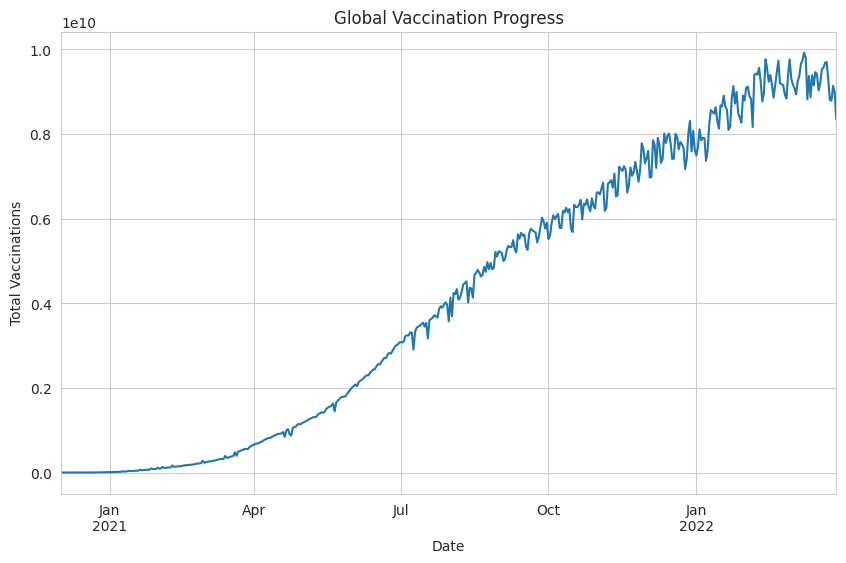

In [ ]:
plt.figure(figsize=(10, 6))
global_vaccinations.plot()
plt.title('Global Vaccination Progress')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.grid(True)
plt.show()

In [ ]:
# Country-wise Analysis:
# Identify the top 10 countries with the highest number of vaccinations:

In [ ]:
country_vaccinations = df.groupby('country')['total_vaccinations'].max()
top_10_countries = country_vaccinations.nlargest(10)
print("Top 10 Countries with the Highest Number of Vaccinations:")
print(top_10_countries)

Top 10 Countries with the Highest Number of Vaccinations:
country
China            3.263129e+09
India            1.834501e+09
United States    5.601818e+08
Brazil           4.135596e+08
Indonesia        3.771089e+08
Japan            2.543456e+08
Bangladesh       2.436427e+08
Pakistan         2.193686e+08
Vietnam          2.031444e+08
Mexico           1.919079e+08
Name: total_vaccinations, dtype: float64


In [ ]:
top_10_data = df[df['country'].isin(top_10_countries.index)]
top_10_vaccinations_over_time = top_10_data.groupby(['date', 'country'])['total_vaccinations'].max().unstack()

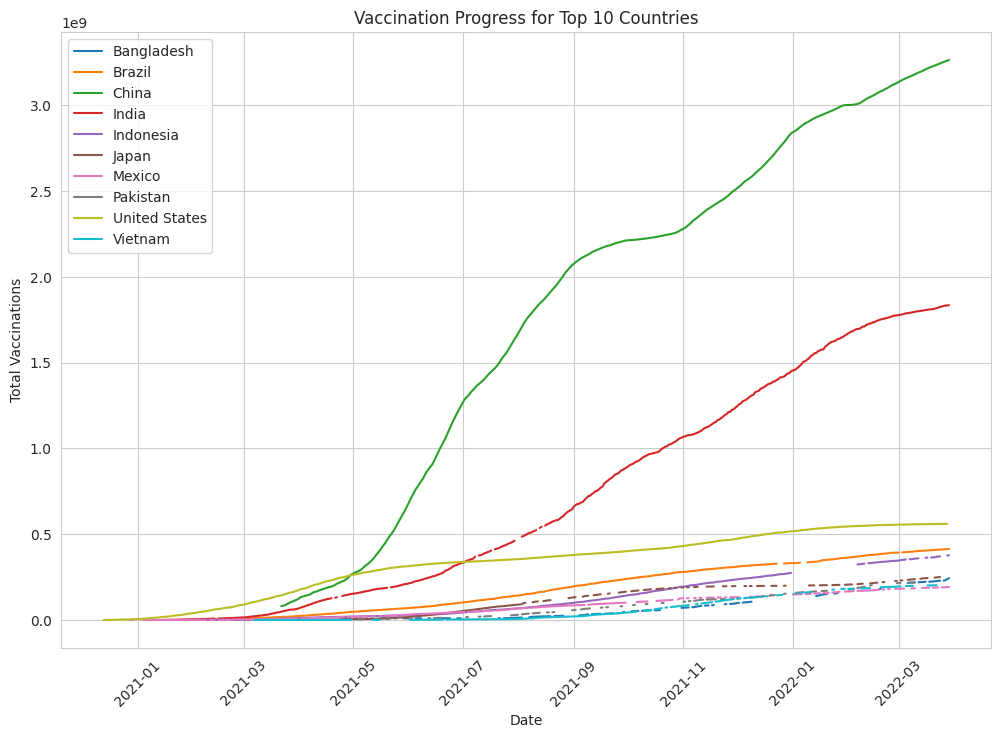

In [ ]:
plt.figure(figsize=(12, 8))
for country in top_10_vaccinations_over_time.columns:
    plt.plot(top_10_vaccinations_over_time.index, top_10_vaccinations_over_time[country], label=country)
plt.title('Vaccination Progress for Top 10 Countries')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Vaccination and Population:

In [ ]:
latest_vaccination_percentage = df.groupby('country')[['people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']].max()

print("Latest Percentage of the Population Vaccinated:")
print(latest_vaccination_percentage)

Latest Percentage of the Population Vaccinated:
                   people_vaccinated_per_hundred  \
country                                            
Afghanistan                                12.76   
Albania                                    44.52   
Algeria                                    16.72   
Andorra                                    74.74   
Angola                                     33.11   
...                                          ...   
Wales                                      79.77   
Wallis and Futuna                          58.44   
Yemen                                       2.11   
Zambia                                     14.96   
Zimbabwe                                   33.48   

                   people_fully_vaccinated_per_hundred  
country                                                 
Afghanistan                                      11.10  
Albania                                          42.30  
Algeria                                        

In [ ]:
# Daily Vaccination Trends:

In [ ]:
daily_vaccinations_global = df.groupby('date')['daily_vaccinations'].sum()

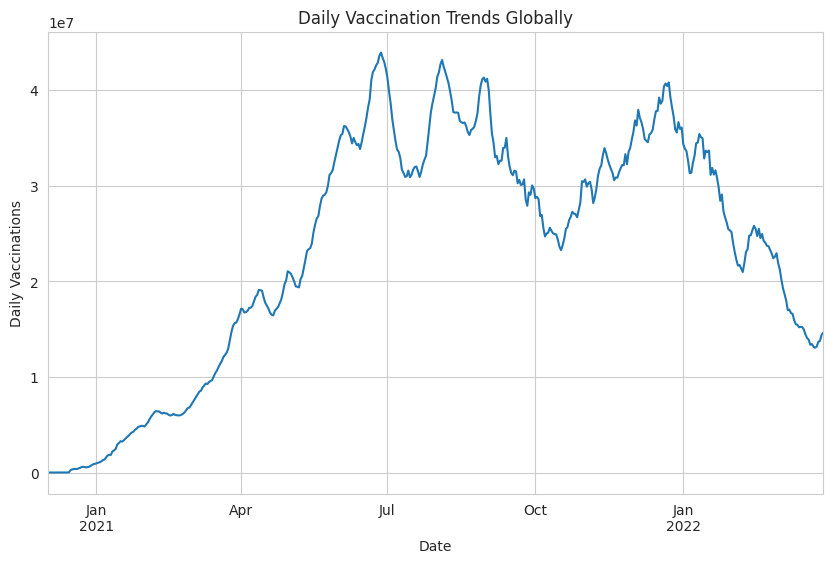

In [ ]:
plt.figure(figsize=(10, 6))
daily_vaccinations_global.plot()
plt.title('Daily Vaccination Trends Globally')
plt.xlabel('Date')
plt.ylabel('Daily Vaccinations')
plt.grid(True)
plt.show()

In [ ]:
countries_of_interest = ['United States', 'United Kingdom', 'India']

In [ ]:
selected_countries_data = df[df['country'].isin(countries_of_interest)]

In [ ]:
daily_vaccinations_selected_countries = selected_countries_data.groupby(['date', 'country'])['daily_vaccinations'].sum().unstack()

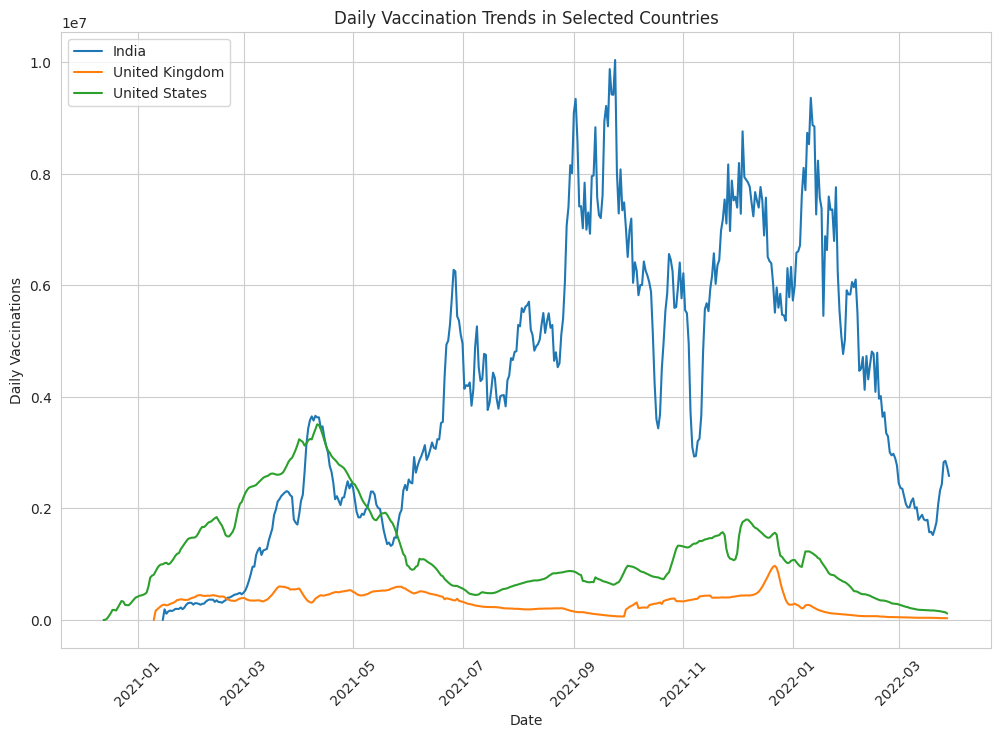

In [ ]:
plt.figure(figsize=(12, 8))
for country in daily_vaccinations_selected_countries.columns:
    plt.plot(daily_vaccinations_selected_countries.index, daily_vaccinations_selected_countries[country], label=country)

plt.title('Daily Vaccination Trends in Selected Countries')
plt.xlabel('Date')
plt.ylabel('Daily Vaccinations')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()